# Regresión logística

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load train data
train = pd.read_csv('./data/train_clean.csv')
# train = pd.read_csv('./data/train_clean_LR_2col.csv')
# train = pd.read_csv('./data/train_clean_LR_First_GS.csv')
test = pd.read_csv('./data/test_clean.csv')
# test = pd.read_csv('./data/test_clean_LR_2col.csv')
# test = pd.read_csv('./data/test_clean_LR_First_GS.csv')

test_results = pd.read_csv('./data/gender_submission.csv')

# Merge test results with test data where PassengerId is the same
test = pd.merge(test, test_results, on='PassengerId')

# Drop 'PassengerId'
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

# # Drop three embarked columns
# train.drop(['Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton'], axis=1, inplace=True)
# test.drop(['Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton'], axis=1, inplace=True)

# # Drop 'Female' from train and test data
# train.drop('Female', axis=1, inplace=True)
# test.drop('Female', axis=1, inplace=True)

# # Drop 'Male' from train and test data
# train.drop('Male', axis=1, inplace=True)
# test.drop('Male', axis=1, inplace=True)

# # Drop everything but 'Male' and 'Female' as train and test data
# train.drop(['Pclass', 'Age', 'Fare', 'Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton'], axis=1, inplace=True)
# test.drop(['Pclass', 'Age', 'Fare', 'Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton'], axis=1, inplace=True)

# Print the list of columns
print(train.columns)

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked_Cherbourg',
       'Embarked_Queenstown', 'Embarked_Southampton', 'Alone', 'Large',
       'Medium', 'Small', 'Female', 'Male'],
      dtype='object')


In [3]:
# Drop the columns that are not needed in the train dataset
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']
print(x_train.columns)

# Drop the columns that are not needed in the test dataset
x_test = test.drop('Survived', axis=1)
y_test = test['Survived']
print(x_test.columns)

Index(['Pclass', 'Age', 'Fare', 'Embarked_Cherbourg', 'Embarked_Queenstown',
       'Embarked_Southampton', 'Alone', 'Large', 'Medium', 'Small', 'Female',
       'Male'],
      dtype='object')
Index(['Pclass', 'Age', 'Fare', 'Embarked_Cherbourg', 'Embarked_Queenstown',
       'Embarked_Southampton', 'Alone', 'Large', 'Medium', 'Small', 'Female',
       'Male'],
      dtype='object')


In [4]:
# Use GridSearchCV to find best parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': np.logspace(-4,4,10),
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid)
grid_search.fit(x_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best parameters: {'C': 21.54434690031882, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8144163016568271


Accuracy: 93.0%
Accuracy: 93.0%
Precision: 88.0%
Recall: 93.0%
F1: 90.0%


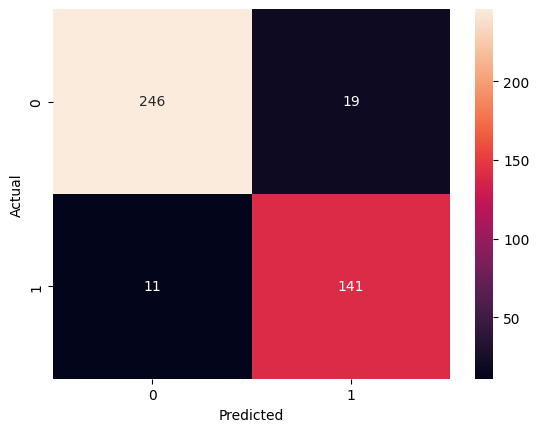

In [5]:
# Predict with best parameters
y_pred = grid_search.predict(x_test)
accuracy = grid_search.score(x_test, y_test)
print(f'Accuracy: {accuracy.round(2)*100}%')
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy.round(2)*100}%')
print(f'Precision: {precision.round(2)*100}%')
print(f'Recall: {recall.round(2)*100}%')
print(f'F1: {f1.round(2)*100}%')

# Confusion Matrix plot
confusion_matrix_2 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(confusion_matrix_2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
# Print model coefficients and the variable names to see which variables are important
coef = grid_search.best_estimator_.coef_
cols = x_train.columns
# Combine the two arrays into a dataframe
coef_df = pd.DataFrame(coef, columns=cols)
coef_df

,Pclass,Age,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Alone,Large,Medium,Small,Female,Male
0,-1.002934,-0.036636,0.00251,0.375725,0.556784,-0.002119,1.323141,-0.413401,-1.149114,1.467204,2.285417,-0.381249


In [7]:
# Fill a model predict with a male with an age of 25 that paid 100 for the ticket, traveled in Pclass 1 and embarked from Cherbourg, it should have 9 features
print(grid_search.predict([[3, 32, 56, 0, 0, 1, 1, 0, 0, 0, 0, 1]]))

[0]


In [8]:
# Pclass = 1, male check if survived in train
variable = train[(train['Male'] == 1)&(train['Survived'] == 1)&(train['Pclass'] == 3) & (train['Alone'] == 1)]
print(len(variable))
variable

32


,Survived,Pclass,Age,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Alone,Large,Medium,Small,Female,Male
36,1,3,47.0,7.2292,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
73,1,3,32.0,56.4958,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
80,1,3,29.0,9.5000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
106,1,3,47.0,7.7750,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
126,1,3,24.0,7.1417,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
145,1,3,27.0,7.7958,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
203,1,3,18.0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
206,1,3,26.0,18.7875,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
219,1,3,16.0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
270,1,3,25.0,0.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# Decision Tree Clasiifier with graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

# Plot the tree with graphviz
dot_data = export_graphviz(clf, out_file=None, feature_names=x_train.columns, class_names=['Died', 'Survived'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('titanic_tree')
graph.view()

'titanic_tree.pdf'